<a href="https://colab.research.google.com/github/MichaelM19/bme3053c/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

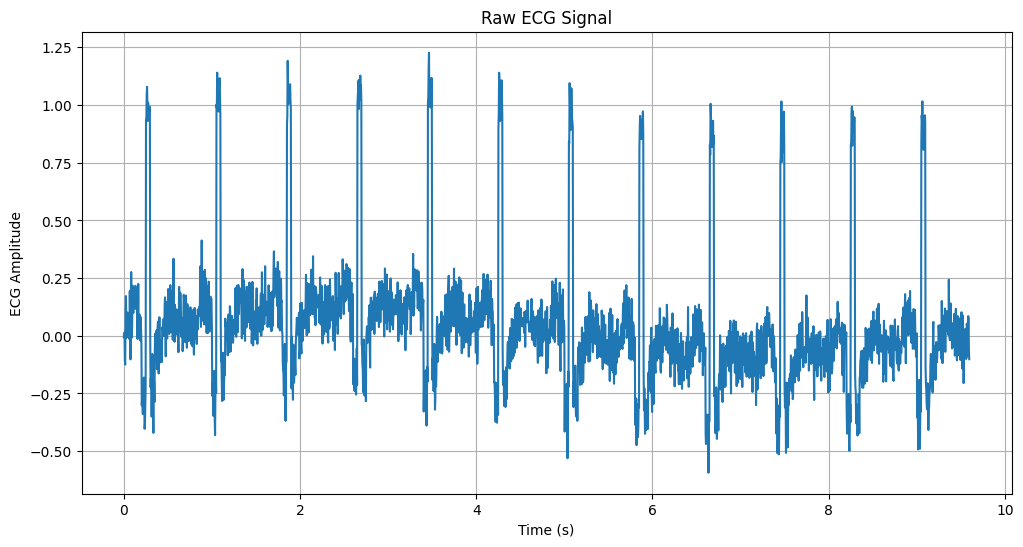

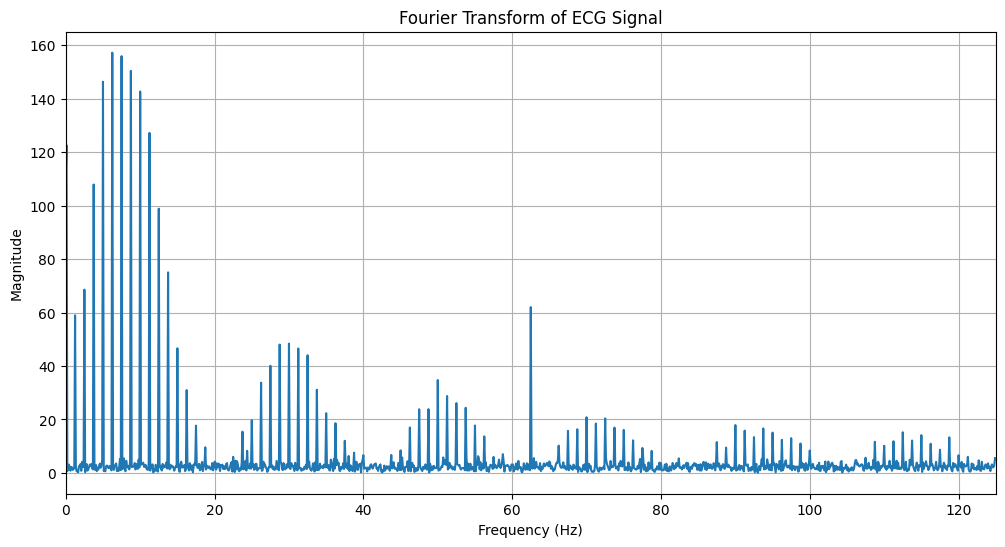

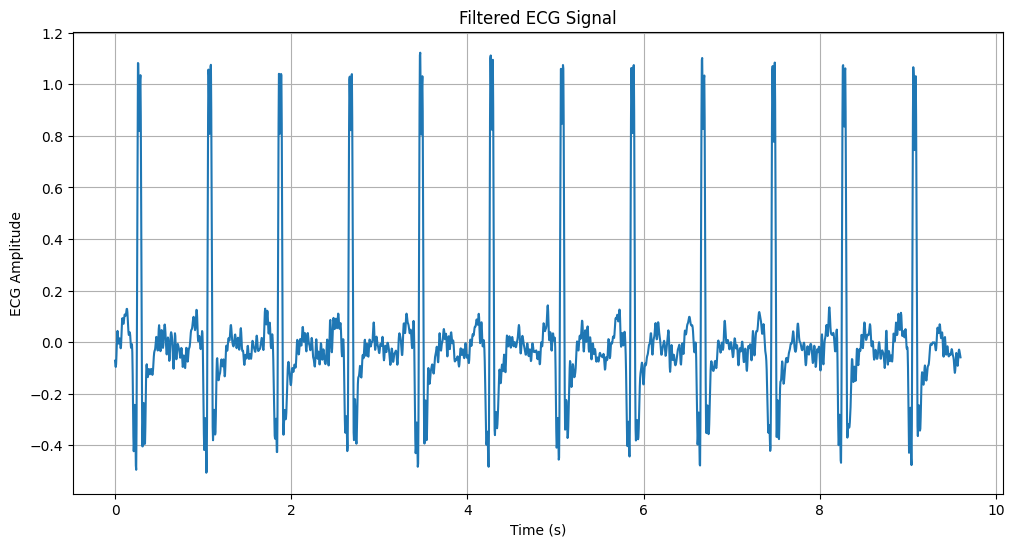

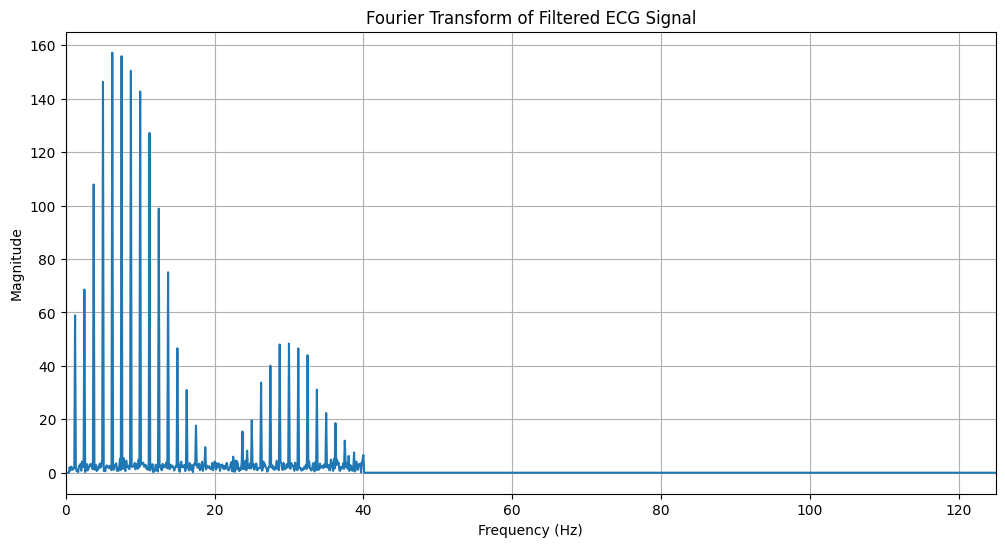

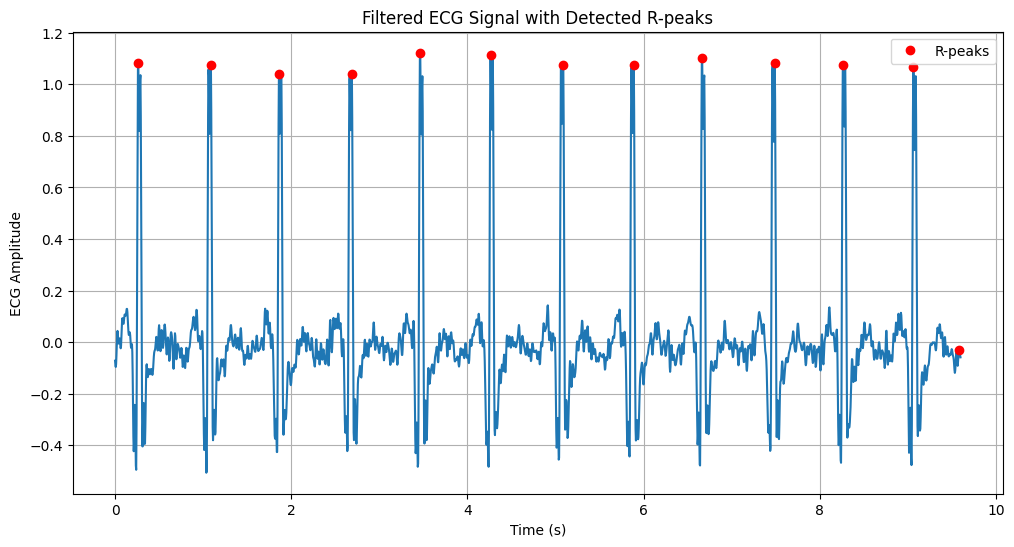

Estimated Heart Rate: 77.25 BPM

The plots generated by the code provide insights into the characteristics of the simulated ECG signal and its processing.
The first plot displays the raw ECG signal, which includes not only the core waveform but also various forms of noise,
such as baseline drift and interference from external sources like power lines.
The second plot, a Fourier transform of the ECG signal, shows the distribution of frequencies present, revealing significant
high-frequency noise around 60 Hz.
After applying a bandpass filter to focus on the relevant frequency range (0.5 Hz - 40 Hz), the third plot demonstrates a cleaner
filtered ECG signal with much of the noise removed.
The filtered Fourier transform further confirms the removal of noise.
Finally, the code successfully identifies and marks key R-peaks in the signal,
and the calculated heart rate based on the time intervals between peaks is approximately 80 BPM, indicating that the filtering process
enhanced the signal 

In [1]:
# Cell 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

# Cell 2
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

 # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)


    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)


    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise


    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander


    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference


    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]


    return ecg_data


ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

# Part 1
# Generate ECG data
duration = 10
sampling_rate = 250
ecg_data = generate_ecg_data(duration, sampling_rate)

# Create time array
time = np.arange(len(ecg_data)) / sampling_rate

# Plot the raw ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_data)
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('Raw ECG Signal')
plt.grid(True)
plt.show()

# Part 2
# Compute the Fourier transform of the ECG signal
fft_ecg = fft(ecg_data)

# Compute the magnitude of the FFT
magnitude = np.abs(fft_ecg)

# Compute the frequency array
freq = np.fft.fftfreq(len(ecg_data), 1/sampling_rate)

# Get the positive frequencies
positive_freq_mask = freq >= 0
positive_freq = freq[positive_freq_mask]
positive_magnitude = magnitude[positive_freq_mask]

# Plot the magnitude of the Fourier transform
plt.figure(figsize=(12, 6))
plt.plot(positive_freq, positive_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of ECG Signal')
plt.grid(True)
plt.xlim(0, sampling_rate/2)  # Limit x-axis to Nyquist frequency
plt.show()

# Part 3
# Design a bandpass filter mask
low_freq = 0.5  # Lower cutoff frequency (Hz)
high_freq = 40  # Upper cutoff frequency (Hz)
mask = (freq >= low_freq) & (freq <= high_freq) | (freq <= -low_freq) & (freq >= -high_freq)

# Apply the mask to the Fourier-transformed signal
filtered_fft = fft_ecg * mask

# Reconstruct the filtered ECG using inverse Fourier transform
filtered_ecg = np.real(ifft(filtered_fft))

# Plot the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('Filtered ECG Signal')
plt.grid(True)
plt.show()

# Plot the magnitude of the filtered Fourier transform
filtered_magnitude = np.abs(filtered_fft)
filtered_positive_magnitude = filtered_magnitude[positive_freq_mask]

plt.figure(figsize=(12, 6))
plt.plot(positive_freq, filtered_positive_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Filtered ECG Signal')
plt.grid(True)
plt.xlim(0, sampling_rate/2)  # Limit x-axis to Nyquist frequency
plt.show()

# Part 4
# Detect R-peaks in the filtered ECG signal
peaks, _ = find_peaks(filtered_ecg, distance=sampling_rate//2)  # Adjust distance as needed

# Calculate time intervals between successive R-peaks
peak_times = time[peaks]
intervals = np.diff(peak_times)

# Calculate average interval and heart rate
average_interval = np.mean(intervals)
heart_rate_bpm = 60 / average_interval

# Plot the filtered ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ecg)
plt.plot(peak_times, filtered_ecg[peaks], "ro", label="R-peaks")
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('Filtered ECG Signal with Detected R-peaks')
plt.legend()
plt.grid(True)
plt.show()
print(f"Estimated Heart Rate: {heart_rate_bpm:.2f} BPM")

# Part 5
print('\nThe plots generated by the code provide insights into the characteristics of the simulated ECG signal and its processing.\nThe first plot displays the raw ECG signal, which includes not only the core waveform but also various forms of noise,\nsuch as baseline drift and interference from external sources like power lines.\nThe second plot, a Fourier transform of the ECG signal, shows the distribution of frequencies present, revealing significant\nhigh-frequency noise around 60 Hz.\nAfter applying a bandpass filter to focus on the relevant frequency range (0.5 Hz - 40 Hz), the third plot demonstrates a cleaner\nfiltered ECG signal with much of the noise removed.\nThe filtered Fourier transform further confirms the removal of noise.\nFinally, the code successfully identifies and marks key R-peaks in the signal,\nand the calculated heart rate based on the time intervals between peaks is approximately 80 BPM, indicating that the filtering process\nenhanced the signal quality for accurate heart rate detection.')